In [1]:
"""
plots the mean and standard deviation for a dataset like this:
Processes, Runtimes (s)
1, 736.293571472168, 737.0942866802216, 735.5175297260284, 739.3102922439575, 739.5581161975861, 736.9531054496765, 737.7334790229797, 735.6266803741455, 739.3151857852936, 735.3527269363403
2, 370.48003911972046, 367.3226811885834, 366.15075278282166, 368.720577955246, 367.7719876766205, 368.0137734413147, 368.6181089878082, 368.12880396842957, 368.6728882789612, 367.36312198638916
5, 149.49971723556519, 149.7080900669098, 149.45071744918823, 148.8714234828949, 149.61127424240112, 149.46119260787964, 149.16143894195557, 148.9453091621399, 149.61758184432983, 149.2231161594391
10, 77.23974657058716, 77.13271021842957, 77.04438400268555, 77.33440971374512, 77.1152617931366, 77.321133852005, 77.21956729888916, 77.34601140022278, 77.13307595252991, 77.21497249603271
15, 53.348053216934204, 53.48887610435486, 53.486061096191406, 53.46216630935669, 53.454602003097534, 53.88533687591553, 53.78724956512451, 53.68875169754028, 53.633052587509155, 53.80236482620239
20, 41.852938413619995, 41.69166398048401, 41.672152280807495, 41.73816227912903, 41.77523899078369, 41.88021445274353, 41.32861876487732, 42.225608587265015, 42.068092823028564, 41.245222330093384
25, 34.777963638305664, 34.27392578125, 34.70881652832031, 34.04554796218872, 34.291768074035645, 34.51704668998718, 34.00176477432251, 34.19276571273804, 34.5119423866272, 36.71297240257263
30, 30.056000471115112, 29.78623628616333, 29.710042476654053, 29.622042655944824, 29.968185663223267, 29.927098989486694, 29.755950212478638, 29.99364972114563, 33.050405740737915, 29.87566828727722
35, 27.565871238708496, 27.174510955810547, 27.165470123291016, 27.94010591506958, 27.183861017227173, 27.049423933029175, 26.962924242019653, 27.116958618164062, 28.469504833221436, 27.51966953277588
40, 42.843737840652466, 42.75209045410156, 42.979042530059814, 42.707443714141846, 42.87197732925415, 42.96374034881592, 42.73070788383484, 42.65036582946777, 42.670893907547, 42.87999749183655
45, 39.971951961517334, 40.44946527481079, 40.03394150733948, 40.2930645942688, 40.03071618080139, 40.030192375183105, 40.13656711578369, 39.94688153266907, 39.846017360687256, 40.040363073349
50, 37.708674907684326, 37.7627534866333, 38.195626974105835, 37.65112233161926, 37.45569467544556, 37.653982162475586, 37.734370946884155, 37.890671730041504, 37.92595839500427, 37.9666485786438

"""

'\nplots the mean and standard deviation for a dataset like this:\nProcesses, Average Runtime (s), Std Dev (s)\n1, 740.2879, 2.0057\n2, 367.5836, 1.6841\n4, 185.5827, 0.2186\n8, 95.2482, 0.3370\n16, 50.1158, 0.1732\n32, 28.4903, 1.5130\n'

Text(0, 0.5, 'Runtime (s)')

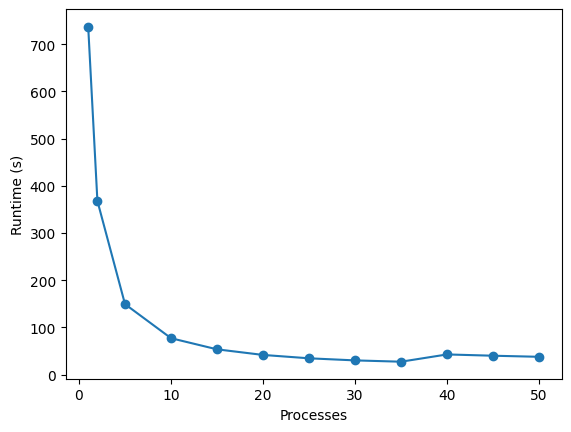

In [48]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(procs, mean, yerr=std, fmt='o-')
plt.xlabel('Processes')
plt.ylabel('Runtime (s)')

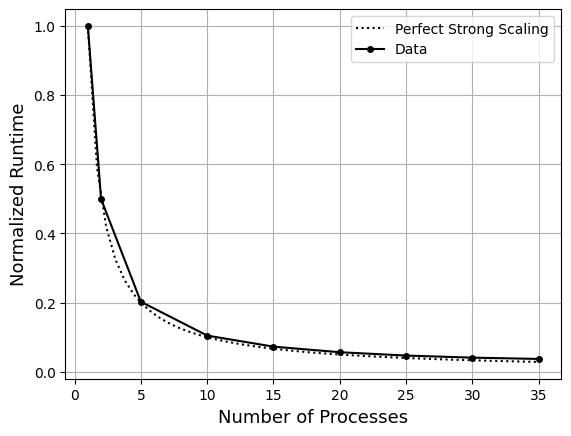

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt('../mpi_runtimes_2.txt', delimiter=',', skip_header=1)
procs = data[:,0]
runtimes = data[:,1:]
mean = np.mean(runtimes, axis=1)
std = np.std(runtimes, axis=1, ddof=1)


# Calculate the perfect strong scaling times
N = np.linspace(1, procs[8], 50)
perfect_strong_scaling_times = 1 / N
plt.plot(N, perfect_strong_scaling_times, label="Perfect Strong Scaling", color="black", linestyle=":")

plt.plot(procs[:9], mean[:9]/mean[0], 'o-', label="Data", color="black", markersize=4)
plt.xlabel('Number of Processes', fontsize=13)
plt.ylabel('Normalized Runtime', fontsize=13)
#plt.yscale('log')
plt.legend()
plt.grid(True)
plt.savefig("plots_for_thesis/mpi_strong_scaling.png")

In [84]:
30*50**2, 1000**2

(75000, 1000000)

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Alpha = 0.008102 +/- 0.000894


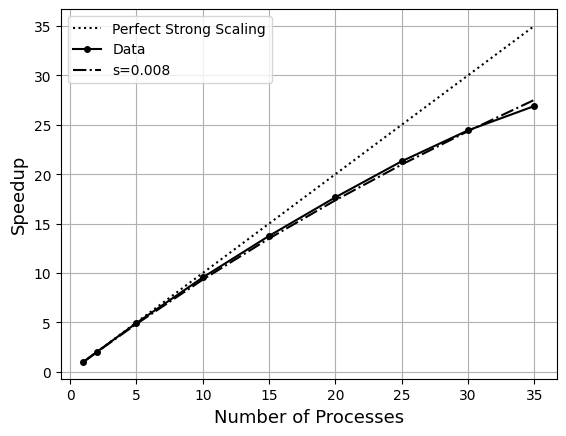

In [2]:
# Normalize the data to speedup values

from scipy.optimize import curve_fit

T = mean[:9]
N = procs[:9]
T0 = T[0]  # Execution time with 1 processor
SP = T0 / T  # Speedup
SP_dev = SP * std[:9] / mean[:9]  # Speedup deviation

def amdahl_law(N, alpha):
    P = 1 - alpha
    return 1 / (alpha + P / N)

# Perform the curve fitting
popt_center, pcov_center = curve_fit(amdahl_law, N, SP)
# Extract the alpha value
alpha_fit_center = popt_center[0]

# Curve fit for the upper bound
popt_upper, pcov_upper = curve_fit(amdahl_law, N, SP + SP_dev)
alpha_fit_upper = popt_upper[0]

alpha_fit_std = np.abs(alpha_fit_center - alpha_fit_upper)

print(f"Alpha = {alpha_fit_center:.6f} +/- {alpha_fit_std:.6f}")

#plot the speedup curve vs the data curve
plt.plot(N, amdahl_law(N, 0), label='Perfect Strong Scaling', color='black', linestyle=':')
plt.plot(N, SP, 'o-', label='Data', color='black', markersize=4)
plt.plot(N, amdahl_law(N, 0.008), label='s=0.008', color='black', linestyle='dashdot')
plt.legend()
plt.xlabel('Number of Processes', fontsize=13)
plt.ylabel('Speedup', fontsize=13)
plt.grid(True)
plt.savefig('plots_for_thesis/mpi_speedup_strong.png')

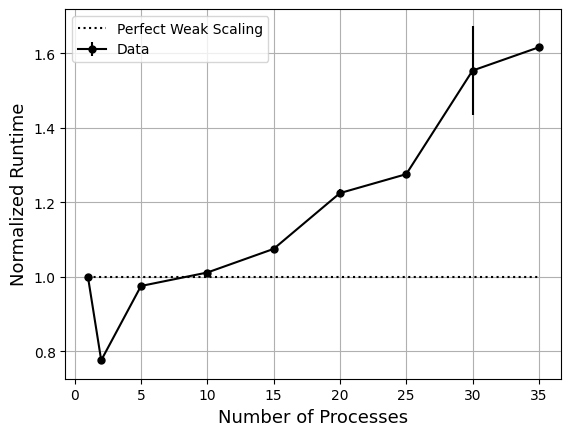

In [3]:
# now we check the weak scaling
data = np.genfromtxt('../mpi_runtimes_weak.txt', delimiter=',', skip_header=1)
procs = data[:,0]
runtimes = data[:,1:]
mean = np.mean(runtimes, axis=1)
std = np.std(runtimes, axis=1, ddof=1)

# Calculate the perfect weak scaling times
N = procs
perfect_weak_scaling_times = np.ones(len(N))
plt.plot(N[:-3], perfect_weak_scaling_times[:-3], label="Perfect Weak Scaling", color="black", linestyle=":")
plt.errorbar(procs[:-3], mean[:-3]/mean[0], std[:-3]/mean[0], label="Data", color="black", markersize=5, fmt='o-')
plt.xlabel('Number of Processes', fontsize=13)
plt.ylabel('Normalized Runtime', fontsize=13)
plt.legend()
plt.grid(True)
plt.savefig("plots_for_thesis/mpi_weak_scaling.png")